In [1]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
vocabulary = []
# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
    words = []
    words = email.split()
    return words
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(li):
      porter = PorterStemmer()
      stem_words = []
      for i in li:
        stem_words.append(porter.stem(i))
      return stem_words

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words

def remove_stop_words(li):
      stem_no_stop_words = []
      stop_words = set(stopwords.words('english'))
      for w in li:
        if w not in stop_words:
          stem_no_stop_words.append(w)
      return stem_no_stop_words

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary

def build_vocabulary(li):
      for i in li:
        if i not in vocabulary:
            vocabulary.append(i)

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(list_stem):
      email_bow = []
      for i in range(len(vocabulary)):
        email_bow.append(0)
      for i in range(len(vocabulary)):
        if vocabulary[i] in list_stem:
            email_bow[i] = 1
      return email_bow

# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()

def text_to_bow(email):
    words = []
    words = read_email(email)
    words = stemming(words)
    words = remove_stop_words(words)
    return get_bow(words)


def read_data():
  e = open(r"spam_or_not_spam.csv", encoding="utf8")
  li=[]
  for i in e:
    i=i.replace("\n","").split(",")
    li.append(i)
  e.close()
  d = {}

  data = []
  temp = 0
  for i in range(0, len(li)):
    if(i != 0):
      d[li[i][0]] = int(li[i][1])
  
  for i in d:
    x = read_email(i)
    x = stemming(x)
    x = remove_stop_words(x)
    build_vocabulary(x)
    
  for i in d:
    data.append((text_to_bow(i), d[i]))
  return data

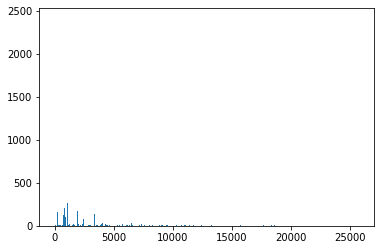

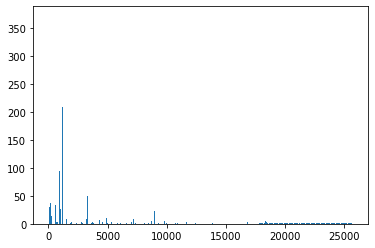

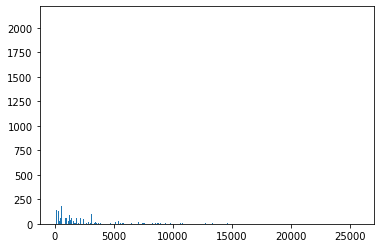

In [2]:
import matplotlib.pyplot as plt

# visuallze data distribution
def data_vis(data):
    d = {}
    values_all = []
    values_spam = []
    values_non_spam = []
    for i in range(len(vocabulary)):
        values_all.append(0)
        values_spam.append(0)
        values_non_spam.append(0)
    for i in data:
        a1 = [] 
        (a1, a2) = i
        for j in range(len(a1)):
            values_all[j] = values_all[j] + a1[j]
        if(a2 == 1):
            for j in range(len(a1)):
                values_spam[j] = values_spam[j] + a1[j]
        else:
            for j in range(len(a1)):
                values_non_spam[j] = values_non_spam[j] + a1[j]
  
    v = range(len(vocabulary))
 
    # creating the bar plot
    plt.bar(v, values_all)
    plt.show()
    plt.bar(v, values_spam)
    plt.show()
    plt.bar(v, values_non_spam)
    plt.show()
    
    return
data = []
data = read_data()
data_vis(data)

In [3]:
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


# split dataset
def split(data):
    train_data = []
    test_data = []
    random.shuffle(data)
    split = int(0.8*len(data))
    train_data = data[:split]
    test_data = data[split:]
    return train_data, test_data

# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train_data, test_data):
    clf = svm.SVC()
    tr_data = []
    label_tr = []
    
    for i in train_data:
        (a1,a2) = i
        label_tr.append(a2)
        tr_data.append(a1)
    test_d = []
    for i in test_data:
        (a1,a2) = i
        test_d.append(a1)
    
    clf.fit(tr_data, label_tr)
    
    predict_train = clf.predict(tr_data)
    predict_test = clf.predict(test_d)
    
    return predict_train, predict_test

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_data, teast_data):
    
    tr_data = []
    label_tr = []
    
    for i in train_data:
        (a1,a2) = i
        label_tr.append(a2)
        tr_data.append(a1)
        
    
    test_d = []
    label_test = []
    for i in test_data:
        (a1,a2) = i
        label_test.append(a2)
        test_d.append(a1)
        
    knn_clf = KNeighborsClassifier(n_neighbors=3)
    knn_clf.fit(tr_data, label_tr)
    
    predict_labels = knn_clf.predict(test_d)
    predict_train = knn_clf.predict(tr_data)

    return predict_train, predict_labels

train_data, test_data = split(data)
svm_train_predictions, svm_test_predictions = svm_classifier(train_data, test_data)
knn_train_predictions, knn_test_predictions = knn_classifier(train_data, test_data)

In [4]:
from sklearn import metrics

tr_label = []

for i in train_data:
    (a1,a2) = i
    tr_label.append(a2)
           
test_label = []

for i in test_data:
    (a1,a2) = i
    test_label.append(a2)

# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
    acc = metrics.accuracy_score(true_labels, predicted_labels)  
    return acc

# compute AUC score 
def compute_auc(true_labels, predicted_labels):
    auc = metrics.roc_auc_score(true_labels, predicted_labels)
    return auc

# write code to print train and test accuracy and AUC score of SVM and k-NN classifier
print("Accuracy of Train data in SVM: ")
print("Train Accuracy:")
print(compute_accuracy(tr_label,svm_train_predictions))
print("AUC Score:")
print(compute_auc(tr_label,svm_train_predictions))
print()
print("Accuracy of Test data in SVM: ")
print("Test Accuracy:")
print(compute_accuracy(test_label,svm_test_predictions))
print("AUC Score:")
print(compute_auc(test_label,svm_test_predictions))
print()
print("Accuracy of Train data in KNN: ")
print("Accuracy:")
print(compute_accuracy(tr_label,knn_train_predictions))
print("AUC Score:")
print(compute_auc(tr_label,knn_train_predictions))
print()
print("Accuracy of Test data in KNN: ")
print("Accuracy:")
print(compute_accuracy(test_label,knn_test_predictions))
print("AUC Score:")
print(compute_auc(test_label,knn_test_predictions))

Accuracy of Train data in SVM: 
Train Accuracy:
0.9934725848563969
AUC Score:
0.9776119402985075

Accuracy of Test data in SVM: 
Test Accuracy:
0.9704347826086956
AUC Score:
0.9086021505376345

Accuracy of Train data in KNN: 
Accuracy:
0.9482158398607484
AUC Score:
0.9523596992115327

Accuracy of Test data in KNN: 
Accuracy:
0.8539130434782609
AUC Score:
0.8391000758488378
